In [157]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [158]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
sample = pd.read_csv("sample_submission.csv")

In [159]:
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [160]:
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [161]:
train.shape

(29451, 12)

In [162]:
test.shape

(68720, 11)

In [163]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [164]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68720 entries, 0 to 68719
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POSTED_BY           68720 non-null  object 
 1   UNDER_CONSTRUCTION  68720 non-null  int64  
 2   RERA                68720 non-null  int64  
 3   BHK_NO.             68720 non-null  int64  
 4   BHK_OR_RK           68720 non-null  object 
 5   SQUARE_FT           68720 non-null  float64
 6   READY_TO_MOVE       68720 non-null  int64  
 7   RESALE              68720 non-null  int64  
 8   ADDRESS             68720 non-null  object 
 9   LONGITUDE           68720 non-null  float64
 10  LATITUDE            68720 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 5.8+ MB


In [165]:
train.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [166]:
train.isna().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [167]:
test.isna().sum()

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
ADDRESS               0
LONGITUDE             0
LATITUDE              0
dtype: int64

In [168]:
train["source"] = "train"
test["source"] = "test"

In [169]:
df = pd.concat([train,test])

In [170]:
df.shape

(98171, 13)

In [171]:
df["POSTED_BY"].nunique()

3

In [172]:
df["POSTED_BY"].value_counts()

Dealer     60728
Owner      35458
Builder     1985
Name: POSTED_BY, dtype: int64

In [173]:
df["UNDER_CONSTRUCTION"].nunique()

2

In [174]:
df["UNDER_CONSTRUCTION"].value_counts()

0    80744
1    17427
Name: UNDER_CONSTRUCTION, dtype: int64

In [175]:
df["BHK_NO."].nunique()

19

In [176]:
df["BHK_NO."].value_counts()

2     44322
3     35302
1     11957
4      5724
5       584
6       158
7        28
8        25
9        16
12       16
10       12
20       10
11        5
13        4
15        4
16        1
17        1
18        1
31        1
Name: BHK_NO., dtype: int64

In [177]:
## df["BHK_NO."] == 31 -  need to remove ?

In [178]:
df["SQUARE_FT"].nunique()

48733

In [179]:
df["SQUARE_FT"].value_counts()

1000.000000    1590
1250.000000     982
800.000000      643
1200.000000     612
1600.000000     407
               ... 
910.299003        1
1190.298507       1
2153.030805       1
1438.010105       1
1089.845827       1
Name: SQUARE_FT, Length: 48733, dtype: int64

In [180]:
df["READY_TO_MOVE"].nunique()

2

In [181]:
df["RESALE"].nunique()

2

In [182]:
df["RESALE"].value_counts()

1    91527
0     6644
Name: RESALE, dtype: int64

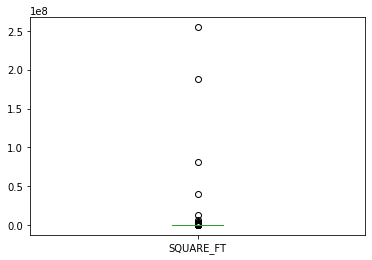

In [183]:
df["SQUARE_FT"].plot(kind = "box")

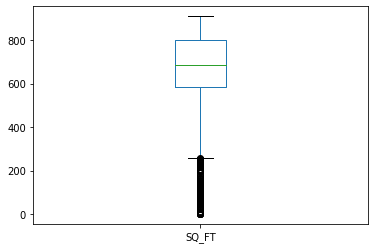

In [184]:
df["SQ_FT"] = df["SQUARE_FT"]
df_SQ_FT = df[(df.SQ_FT <= 910)]
df_SQ_FT["SQ_FT"].value_counts()
df_SQ_FT["SQ_FT"].plot(kind = "box")
#df_SQ_FT["SQ_FT"].value_counts()

In [185]:
df["BHK_NO"] = df["BHK_NO."]
df_bhk_no = df[(df.BHK_NO != 31)]
df_bhk_no["BHK_NO"]

0        2
1        2
2        2
3        2
4        2
        ..
68715    2
68716    3
68717    1
68718    2
68719    3
Name: BHK_NO, Length: 98170, dtype: int64

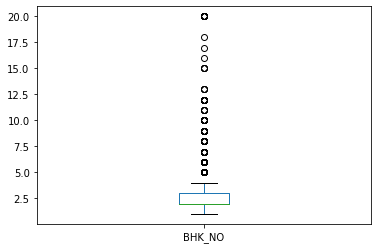

In [186]:
df_bhk_no["BHK_NO"].plot(kind = "box")

In [187]:
#Check for Multi Collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# the independent variables set 
X = df.select_dtypes(include=np.number).drop(columns=["BHK_NO.","SQUARE_FT","TARGET(PRICE_IN_LACS)","UNDER_CONSTRUCTION"])
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

         feature        VIF
0           RERA   1.680685
1  READY_TO_MOVE   6.894290
2         RESALE  15.526169
3      LONGITUDE  11.100301
4       LATITUDE  21.145173
5          SQ_FT   1.000129
6         BHK_NO   8.334766


In [188]:
df.select_dtypes(include=np.number).drop(columns=["BHK_NO.","SQUARE_FT","TARGET(PRICE_IN_LACS)","UNDER_CONSTRUCTION"])

,RERA,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,SQ_FT,BHK_NO
0,0,1,1,12.969910,77.597960,1300.236407,2
1,0,1,1,12.274538,76.644605,1275.000000,2
2,0,1,1,12.778033,77.632191,933.159722,2
3,1,1,1,28.642300,77.344500,929.921143,2
4,0,0,1,22.592200,88.484911,999.009247,2
...,...,...,...,...,...,...,...
68715,1,1,1,19.180000,72.963330,856.555505,2
68716,1,1,1,30.661104,76.746082,2304.147465,3
68717,1,0,0,19.222101,72.988231,33362.792750,1
68718,0,1,1,18.496670,73.941670,1173.708920,2


In [189]:
df_number_columns = df.select_dtypes(include = np.number).columns

In [190]:
df_number_columns

Index(['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE',
       'RESALE', 'LONGITUDE', 'LATITUDE', 'TARGET(PRICE_IN_LACS)', 'SQ_FT',
       'BHK_NO'],
      dtype='object')

In [191]:
df_category_columns = df.select_dtypes(exclude = np.number).columns

In [192]:
df_category_columns

Index(['POSTED_BY', 'BHK_OR_RK', 'ADDRESS', 'source'], dtype='object')

In [193]:
data_to_encode = df[df_category_columns].drop(columns = ["BHK_OR_RK","ADDRESS","source"])

In [194]:
df_category_encoded = pd.get_dummies(data_to_encode)

In [195]:
df_final = pd.concat([df_category_encoded, df[df_number_columns],df[["BHK_OR_RK","ADDRESS","source"]]], axis= 1)

In [196]:
train_preprocessed = df_final[df["source"]=="train"]
train_preprocessed

,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),SQ_FT,BHK_NO,BHK_OR_RK,ADDRESS,source
0,0,0,1,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,1300.236407,2,BHK,"Ksfc Layout,Bangalore",train
1,0,1,0,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0,1275.000000,2,BHK,"Vishweshwara Nagar,Mysore",train
2,0,0,1,0,0,2,933.159722,1,1,12.778033,77.632191,43.0,933.159722,2,BHK,"Jigani,Bangalore",train
3,0,0,1,0,1,2,929.921143,1,1,28.642300,77.344500,62.5,929.921143,2,BHK,"Sector-1 Vaishali,Ghaziabad",train
4,0,1,0,1,0,2,999.009247,0,1,22.592200,88.484911,60.5,999.009247,2,BHK,"New Town,Kolkata",train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,0,0,1,0,0,3,2500.000000,1,1,27.140626,78.043277,45.0,2500.000000,3,BHK,"Shamshabad Road,Agra",train
29447,0,0,1,0,0,2,769.230769,1,1,39.945409,-86.150721,16.0,769.230769,2,BHK,"E3-108, Lake View Recidency,,Vapi",train
29448,0,1,0,0,0,2,1022.641509,1,1,26.928785,75.828002,27.1,1022.641509,2,BHK,"Ajmer Road,Jaipur",train
29449,0,0,1,0,0,2,927.079009,1,1,12.900150,80.227910,67.0,927.079009,2,BHK,"Sholinganallur,Chennai",train


In [197]:
test_preprocessed = df_final[df_final["source"]=="test"]

In [198]:
del train_preprocessed["source"]
train_preprocessed

,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),SQ_FT,BHK_NO,BHK_OR_RK,ADDRESS
0,0,0,1,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,1300.236407,2,BHK,"Ksfc Layout,Bangalore"
1,0,1,0,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0,1275.000000,2,BHK,"Vishweshwara Nagar,Mysore"
2,0,0,1,0,0,2,933.159722,1,1,12.778033,77.632191,43.0,933.159722,2,BHK,"Jigani,Bangalore"
3,0,0,1,0,1,2,929.921143,1,1,28.642300,77.344500,62.5,929.921143,2,BHK,"Sector-1 Vaishali,Ghaziabad"
4,0,1,0,1,0,2,999.009247,0,1,22.592200,88.484911,60.5,999.009247,2,BHK,"New Town,Kolkata"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,0,0,1,0,0,3,2500.000000,1,1,27.140626,78.043277,45.0,2500.000000,3,BHK,"Shamshabad Road,Agra"
29447,0,0,1,0,0,2,769.230769,1,1,39.945409,-86.150721,16.0,769.230769,2,BHK,"E3-108, Lake View Recidency,,Vapi"
29448,0,1,0,0,0,2,1022.641509,1,1,26.928785,75.828002,27.1,1022.641509,2,BHK,"Ajmer Road,Jaipur"
29449,0,0,1,0,0,2,927.079009,1,1,12.900150,80.227910,67.0,927.079009,2,BHK,"Sholinganallur,Chennai"


In [199]:
del test_preprocessed["source"]
test_preprocessed

,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),SQ_FT,BHK_NO,BHK_OR_RK,ADDRESS
0,0,0,1,0,0,1,545.171340,1,1,21.262000,73.047700,NaN,545.171340,1,BHK,"Kamrej,Surat"
1,0,1,0,1,1,2,800.000000,0,0,18.966114,73.148278,NaN,800.000000,2,BHK,"Panvel,Lalitpur"
2,0,1,0,0,0,2,1257.096513,1,1,22.592200,88.484911,NaN,1257.096513,2,BHK,"New Town,Kolkata"
3,0,1,0,0,0,3,1400.329489,1,1,26.988300,75.584600,NaN,1400.329489,3,BHK,"Kalwar Road,Jaipur"
4,0,0,1,0,0,1,430.477830,1,1,22.700000,72.870000,NaN,430.477830,1,BHK,"Mai Mandir,Nadiad"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68715,0,1,0,0,1,2,856.555505,1,1,19.180000,72.963330,NaN,856.555505,2,BHK,"Thane West,Maharashtra"
68716,0,1,0,0,1,3,2304.147465,1,1,30.661104,76.746082,NaN,2304.147465,3,BHK,"Sector-66A Mohali,Mohali"
68717,0,1,0,1,1,1,33362.792750,0,0,19.222101,72.988231,NaN,33362.792750,1,BHK,"Balkum,Maharashtra"
68718,0,1,0,0,0,2,1173.708920,1,1,18.496670,73.941670,NaN,1173.708920,2,BHK,"Hadapsar,Pune"


In [200]:
train.shape

(29451, 13)

In [201]:
test.shape

(68720, 12)

In [202]:
train_preprocessed.shape

(29451, 16)

In [203]:
test_preprocessed.shape

(68720, 16)

In [204]:
train_preprocessed.to_csv("train_Houseprice_prdiction_Preprocessed_1.csv", index = False)
test_preprocessed.to_csv("test_Houseprice_prdiction_Preprocessed_1.csv", index = False)